<a href="https://colab.research.google.com/github/Faitsu/Basic-Computer-Graphics-Notebook/blob/main/Erica_Chou_Computer_Vision_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision Project 1: Histogram Equalization & Otsu Thresholding

##Set up: 


#### This block of code is here primarily to set up import 

In [ ]:
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
import copy
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')

Mounted at /content/drive


##Part A: Histogram Equalization

###Setup

In [ ]:
def im_setup(img_path):
  #Set up for image a1_c for histogram equalization
  im = cv2.imread(img_path, 0)
  (h, w) = im.shape[:2]
  max_res = 200
  if h>w:
    r = max_res / float(h)
    dim = (int(w * r), max_res)
  else:
    r = max_res / float(w)
    dim = (max_res, int(h * r))
  im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
  im_uint8 = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) * 255)).astype('uint8')
  return im_uint8

# *Note* im_uint8 is the normalized grayscale image

### Functions

In [ ]:
# Create normalized intensity histogram from an input image
def create_pdf(im_in):
  pdf = np.zeros(256)
  h_im, w_im = im_in.shape[:2]
  #create basic histogram
  for i in range (0,h_im):
    for j in range (0,w_im):
      #print(im_in[i][j])
      pdf[ int(im_in[i][j]) ] += 1
  #scale histogram by 1/N which is 1/(h*w)
  for i in range(0,256):
    pdf[i] = pdf[i]/(h_im * w_im)
  return pdf


In [ ]:
def create_cdf(pdf):
  cdf = np.zeros(256)
  cdf[0] = pdf[0]
  for i in range(1,len(pdf)):
    cdf[i] += cdf[i-1] + pdf[i]
  return cdf


In [ ]:
#do histogram equalization
def histogram_equalization(im_in):
  pdf = create_pdf(im_in) 
  cdf = create_cdf(pdf) 
  # Create a histogram equalized image using your computed cdf
  h_im, w_im = im_in.shape[:2]
  equalized_im = np.zeros(shape = (h_im, w_im))
  for i in range (0,h_im):
    for j in range (0,w_im):
      #use original value of pixel to find cdf percentile, multiply by 255 and turn into an int
      equalized_im[i][j] =  int( 255* cdf[im_in[i][j]] )
  equalized_im = equalized_im.astype(int)
  return equalized_im


### Results of Part A

#### First Image Graphs & Results

In [ ]:
im_uint8 = im_setup('/content/drive/My Drive/Spring 2022/a1_b.png')

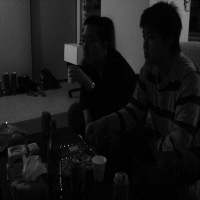

In [ ]:
cv2_imshow(im_uint8)

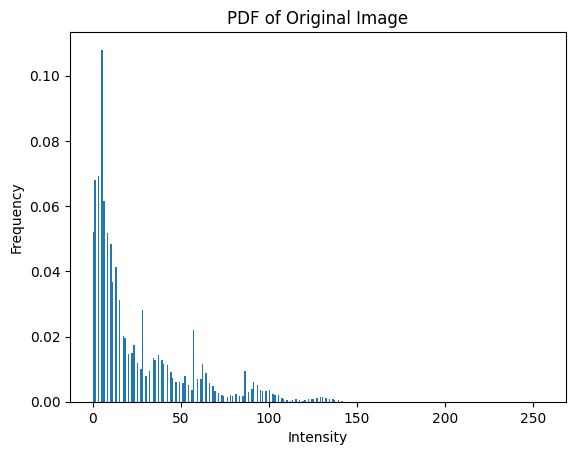

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

inten_freq = create_pdf(im_uint8)
y_pos = np.arange(len(inten_freq))

plt.bar(y_pos, inten_freq,align = 'edge')
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('PDF of Original Image')

plt.show()

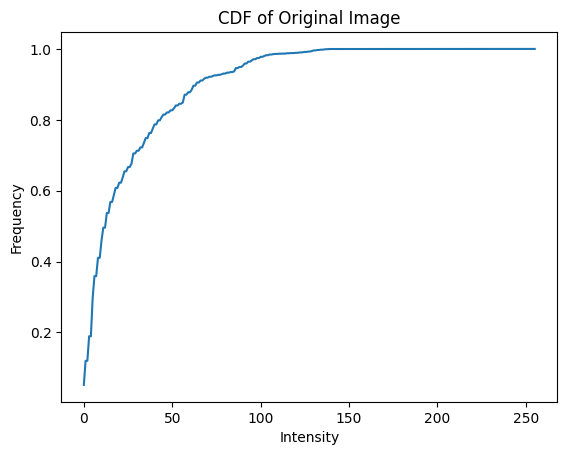

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cdf_freq = create_cdf(inten_freq)
y_pos = np.arange(len(cdf_freq))

plt.plot(cdf_freq)
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('CDF of Original Image')

plt.show()

##### After Image & Graphs

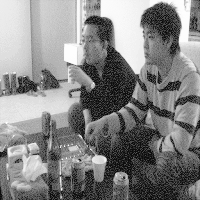

In [ ]:
equalized_im = histogram_equalization(im_uint8)
cv2_imshow(equalized_im)

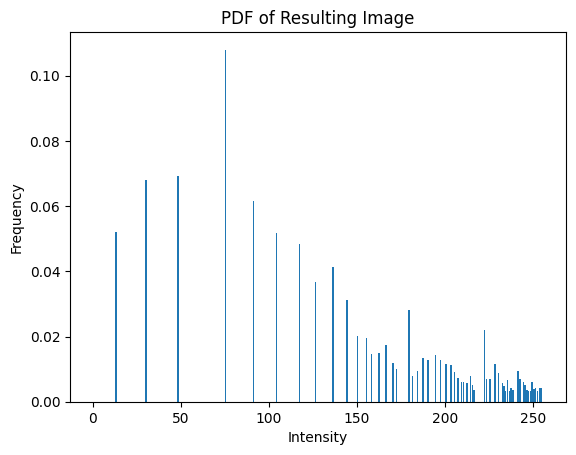

In [ ]:
#After Image pdf
eqinten_freq = create_pdf(equalized_im)
y_pos = np.arange(len(eqinten_freq))

plt.bar(y_pos,eqinten_freq,align = 'edge')
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('PDF of Resulting Image')

plt.show()

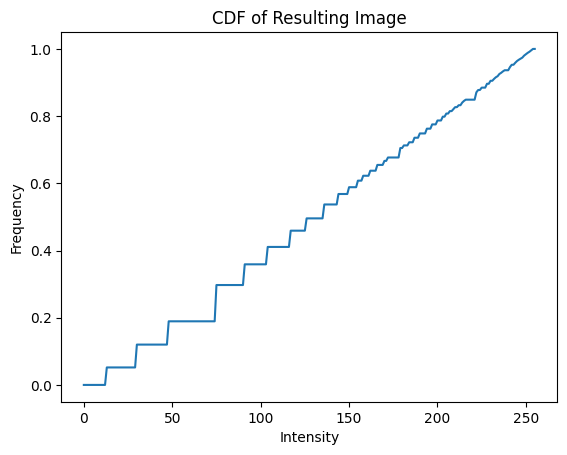

In [ ]:
#After Image Cumulative distribution function
cdf_freq = create_cdf(eqinten_freq)
y_pos = np.arange(len(cdf_freq))

plt.plot(cdf_freq)
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('CDF of Resulting Image')

plt.show()

###### After Image & Graphs pt 2

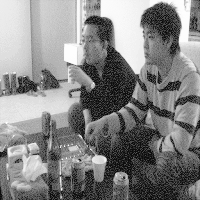

In [ ]:
# Equalize the image once again
reequalized_im = histogram_equalization(equalized_im)
cv2_imshow(reequalized_im)

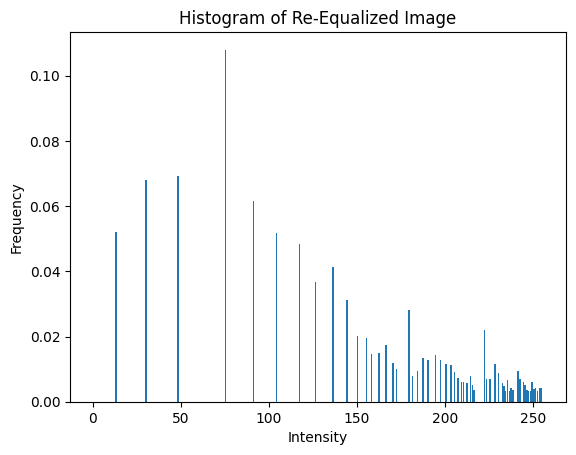

In [ ]:
#After Image pdf
reeqinten_freq = create_pdf(reequalized_im)
y_pos = np.arange(len(reeqinten_freq))

plt.bar(y_pos,reeqinten_freq,align = 'edge')
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('Histogram of Re-Equalized Image')

plt.show()

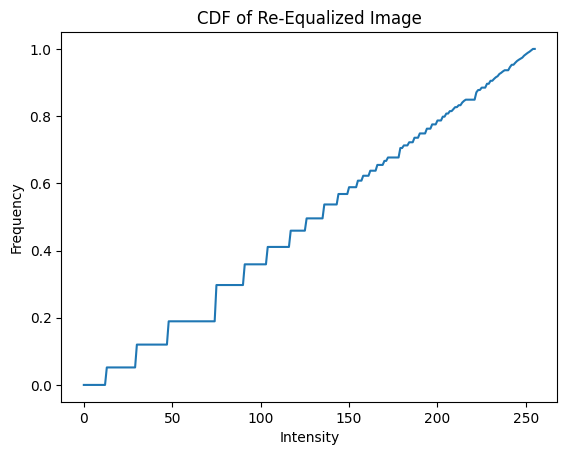

In [ ]:
#After Image Cumulative distribution function
cdf_freq = create_cdf(eqinten_freq)
y_pos = np.arange(len(cdf_freq))

plt.plot(cdf_freq)
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('CDF of Re-Equalized Image')

plt.show()

####Custom Image Equalization

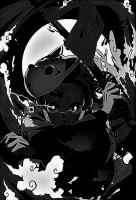

In [ ]:
im_cust = im_setup('/content/drive/My Drive/Spring 2022/a1_e.png')
cv2_imshow(im_cust)


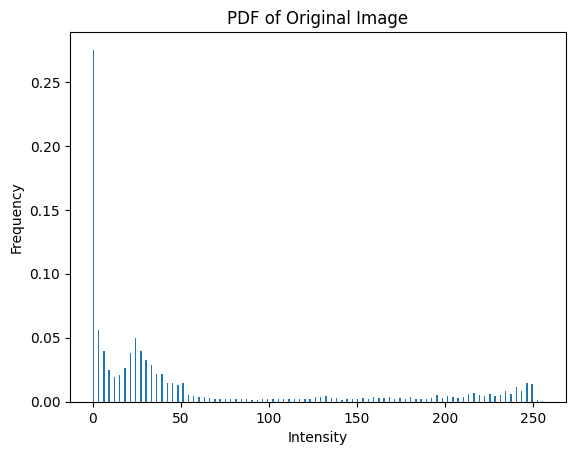

In [ ]:
#Image pdf
cust_pdf = create_pdf(im_cust)
y_pos = np.arange(len(cust_pdf))

plt.bar(y_pos,cust_pdf,align = 'edge')
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('PDF of Original Image')

plt.show()

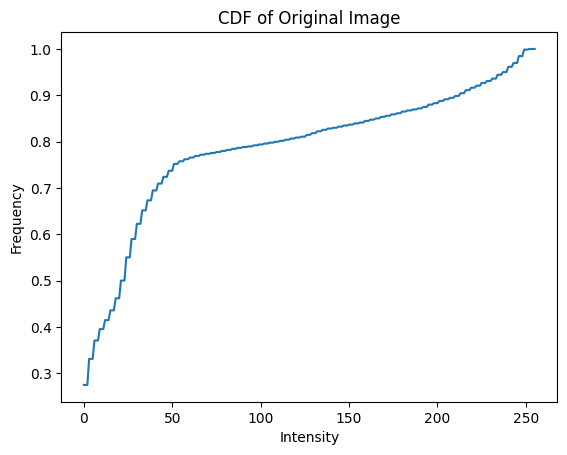

In [ ]:
#After Image Cumulative distribution function
cdf_freq = create_cdf(cust_pdf)
y_pos = np.arange(len(cust_pdf))

plt.plot(cdf_freq)
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('CDF of Original Image')

plt.show()

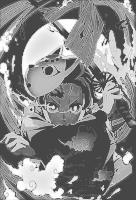

In [ ]:
cust_eqim = histogram_equalization(im_cust)
cv2_imshow(cust_eqim)

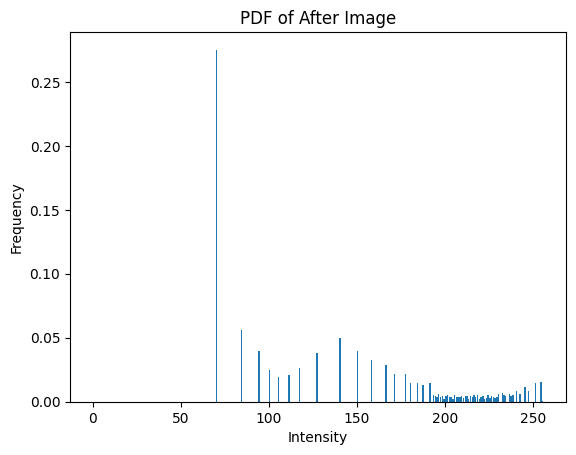

In [ ]:
#Image pdf
custafter_pdf = create_pdf(cust_eqim)
y_pos = np.arange(len(custafter_pdf))

plt.bar(y_pos,custafter_pdf,align = 'edge')
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('PDF of After Image')

plt.show()

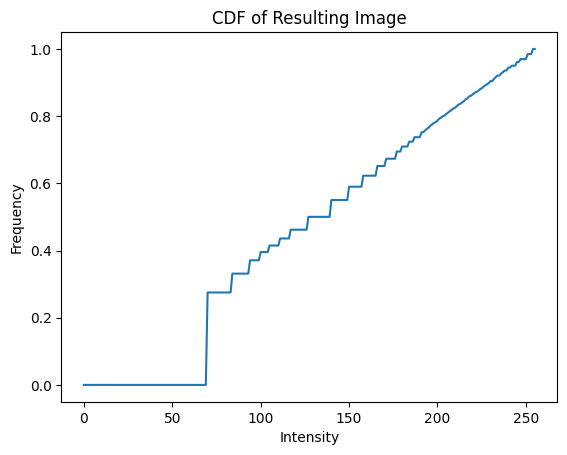

In [ ]:
#After Image Cumulative distribution function
custafter_cdf = create_cdf(custafter_pdf)
y_pos = np.arange(len(custafter_pdf))

plt.plot(custafter_cdf)
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('CDF of Resulting Image')

plt.show()

##Part B: Otsu Thresholding 

##Set up Image & Original histogram

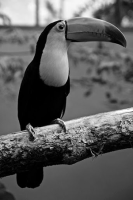

In [ ]:
#Set up for image a2_a for otsu thresholding 
im_otsu_uint8 = im_setup('/content/drive/My Drive/Spring 2022/cust_b.png')

cv2_imshow(im_otsu_uint8)

In [ ]:
# Create normalized intensity histogram from an input image
def create_histo(im_in):
  histo = np.zeros(256)
  h_im, w_im = im_in.shape[:2]
  #create basic histogram
  for i in range (0,h_im):
    for j in range (0,w_im):
      #print(im_in[i][j])
      histo[ int(im_in[i][j]) ] += 1
  #scale histogram by 1/N which is 1/(h*w)
  return histo

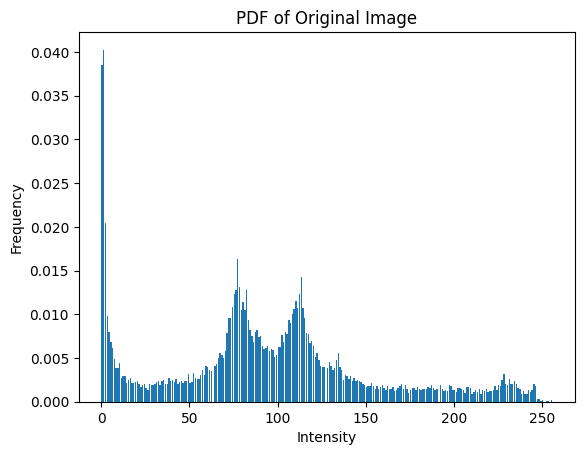

In [ ]:
#histogram for this image
otsu_imhist = create_pdf(im_otsu_uint8)
y_pos = np.arange(len(otsu_imhist))

plt.bar(y_pos,otsu_imhist,align = 'edge')
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('PDF of Original Image')

plt.show()

## Manual Thresholding Algorithm

In [ ]:
def manual_threshold(im_in, threshold):
  # Threshold image with the threshold of your choice
  h_im, w_im = im_in.shape[:2]
  #create new image
  manual_thresh_img = np.zeros(shape = (h_im, w_im))
  for i in range (0,h_im):
    for j in range (0,w_im):
      #use original value of pixel to find cdf percentile, multiply by 255 and turn into an int
      if(im_in[i][j] > threshold):
        manual_thresh_img[i][j]  = 250
      else:
        manual_thresh_img[i][j]  = 10

  return manual_thresh_img


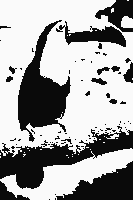

In [ ]:
cv2_imshow(manual_threshold(im_otsu_uint8, 75))

##Otsu Threshold

In [ ]:
def otsu_threshold(im_in):
# Create Otsu thresholded image
  histo = create_pdf(im_in)
  maxThresh = 0
  max_ind = 0
  inter_class_var = np.zeros(256)
  for i in range(0,256):
    #weight values
    w0 = 0
    w1 = 0
    #class mean values
    m0 = 0
    m1 = 0
    # for each possible threshold we need to calculate the weights
    for j in range (0, i-1):
      w0 += histo[j]
      m0 += j * histo[j]
    for k in range (i, 256):
      w1 += histo[k]
      m1 += k * histo[k]
    #Calculate variences 
    if(w0 != 0): #have this if statement to prevent division of 0
      m0 = m0 / w0
    if(w1 != 0):
      m1 = m1 / w1
    #calculation of inter-class variance
    threshold = w0 * w1 * ((m0 - m1)**2) 
    if threshold > maxThresh: #if the threshold value is greater than the currently recorded "MaxThresh", update maxThresh
      maxThresh = threshold
      max_ind = i
    inter_class_var[i] = threshold
  new_img = manual_threshold(im_in, max_ind)
  #return values in this order: new_img, inter_class var graph, max threshold index, max threshold value, 
  return new_img, inter_class_var,max_ind,maxThresh

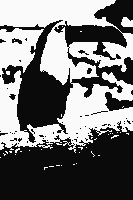

In [ ]:
otsu_values = otsu_threshold(im_otsu_uint8)
otsu_img = otsu_values[0]
cv2_imshow(otsu_img)

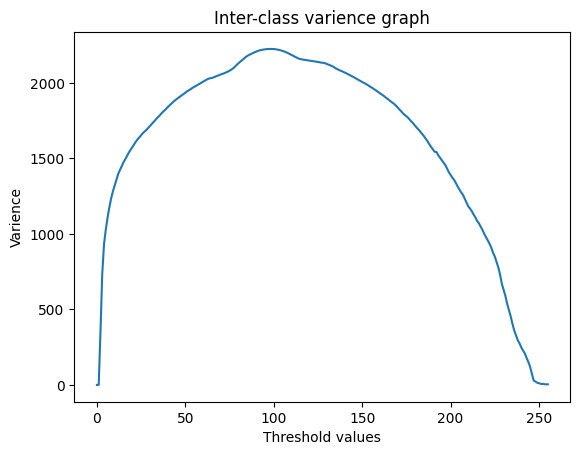

In [ ]:
#After Image Cumulative distribution function
otsu_var = otsu_values[1]
y_pos = np.arange(len(otsu_var))

plt.plot(otsu_var)
plt.ylabel('Varience')
plt.xlabel('Threshold values')
plt.title('Inter-class varience graph')

plt.show()

### Results

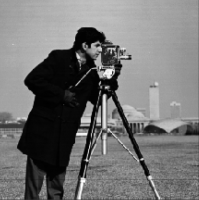

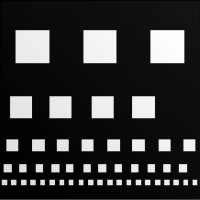

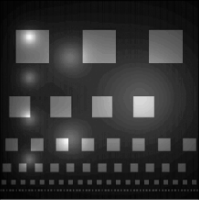

In [ ]:
#Set up for image a2_a for otsu thresholding 
otsu_1 = im_setup('/content/drive/My Drive/Spring 2022/a2_a.png')
otsu_2 = im_setup('/content/drive/My Drive/Spring 2022/a2_b.png')
otsu_3 = im_setup('/content/drive/My Drive/Spring 2022/a2_c.png')

cv2_imshow(otsu_1)
cv2_imshow(otsu_2)
cv2_imshow(otsu_3)

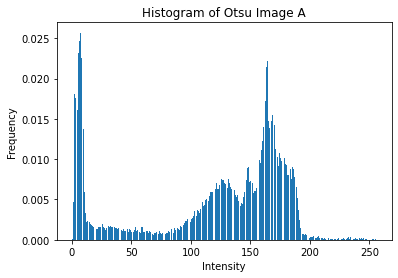

In [ ]:
#histogram for this image
otsu_imhist1 = create_pdf(otsu_1)
y_pos = np.arange(len(otsu_imhist1))

plt.bar(y_pos,otsu_imhist1,align = 'edge')
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('Histogram of Otsu Image A')

plt.show()

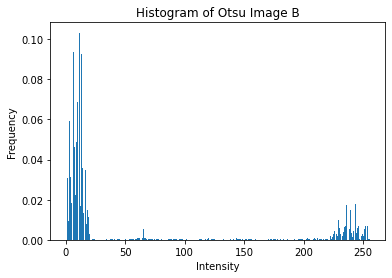

In [ ]:
#histogram for this image
otsu_imhist2 = create_pdf(otsu_2)
y_pos = np.arange(len(otsu_imhist2))

plt.bar(y_pos,otsu_imhist2,align = 'edge')
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('Histogram of Otsu Image B')

plt.show()

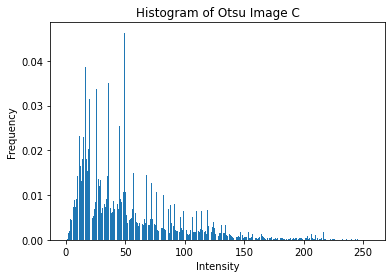

In [ ]:
#histogram for this image
otsu_imhist3 = create_pdf(otsu_3)
y_pos = np.arange(len(otsu_imhist3))

plt.bar(y_pos,otsu_imhist3,align = 'edge')
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.title('Histogram of Otsu Image C')

plt.show()

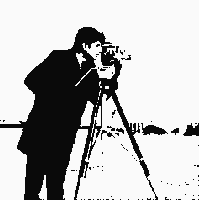

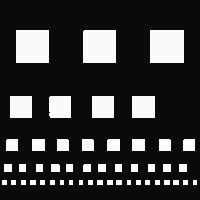

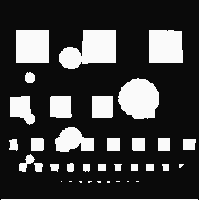

In [ ]:
#otsu threshold results
otsu_values1 = otsu_threshold(otsu_1)
otsu_values2 = otsu_threshold(otsu_2)
otsu_values3 = otsu_threshold(otsu_3)

otsu_img1 = otsu_values1[0]
otsu_img2 = otsu_values2[0]
otsu_img3 = otsu_values3[0]

cv2_imshow(otsu_img1)
cv2_imshow(otsu_img2)
cv2_imshow(otsu_img3)

Max Threshold Index:  85 Max Threshold Value:  3464.3134521974116


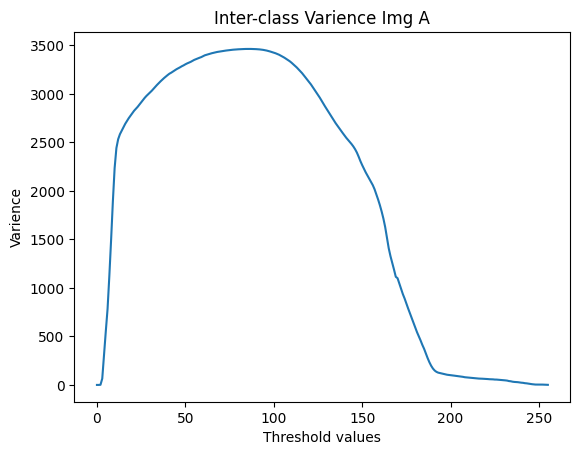

In [ ]:
#inter-class varience graphs
#After Image Cumulative distribution function
otsu_var1 = otsu_values1[1]
y_pos = np.arange(len(otsu_var1))

plt.plot(otsu_var1)
plt.ylabel('Varience')
plt.xlabel('Threshold values')
plt.title('Inter-class Varience Img A')

print("Max Threshold Index: ", otsu_values1[2], "Max Threshold Value: ", otsu_values1[3])

plt.show()

Max Threshold Index:  123 Max Threshold Value:  7560.00238012864


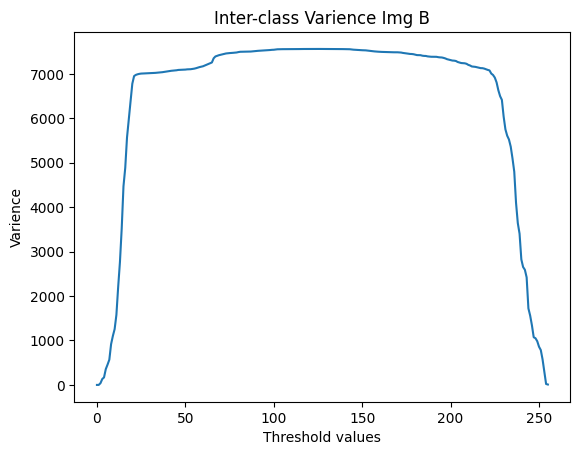

In [ ]:
#inter-class varience graphs
#After Image Cumulative distribution function
otsu_var2 = otsu_values2[1]
y_pos = np.arange(len(otsu_var2))

plt.plot(otsu_var2)
plt.ylabel('Varience')
plt.xlabel('Threshold values')
plt.title('Inter-class Varience Img B')

print("Max Threshold Index: ", otsu_values2[2], "Max Threshold Value: ", otsu_values2[3])

plt.show()

Max Threshold Index:  74 Max Threshold Value:  1139.7568427593847


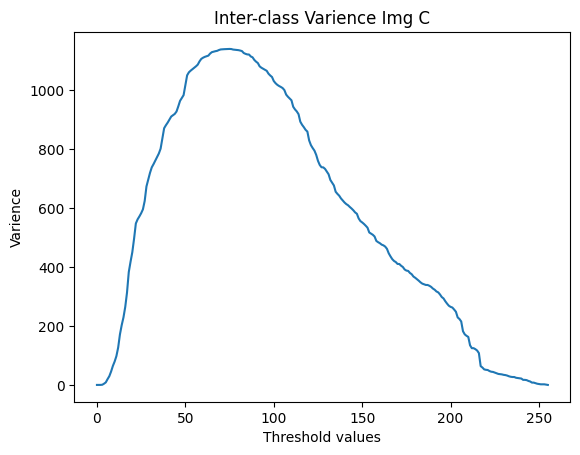

In [ ]:
#inter-class varience graphs
#After Image Cumulative distribution function
otsu_var3 = otsu_values3[1]
y_pos = np.arange(len(otsu_var3))

plt.plot(otsu_var3)
plt.ylabel('Varience')
plt.xlabel('Threshold values')
plt.title('Inter-class Varience Img C')

print("Max Threshold Index: ", otsu_values3[2], "Max Threshold Value: ", otsu_values3[3])

plt.show()